In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Define the scalar function: f(x, y) = x**2 + y
def f(x, y):
    return x**2 + y

# Gradient of f: ∇f = [x, 2y]
def grad_f(x, y):
    return np.array([2*x, 1])


# Grid of points
x_vals = np.linspace(-2, 2, 20)
y_vals = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_vals, y_vals)

/var/folders/jb/kycd0jcj01qc2jshgbryh3y80000gn/T/ipykernel_91390/3023575154.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([2*x, 1])


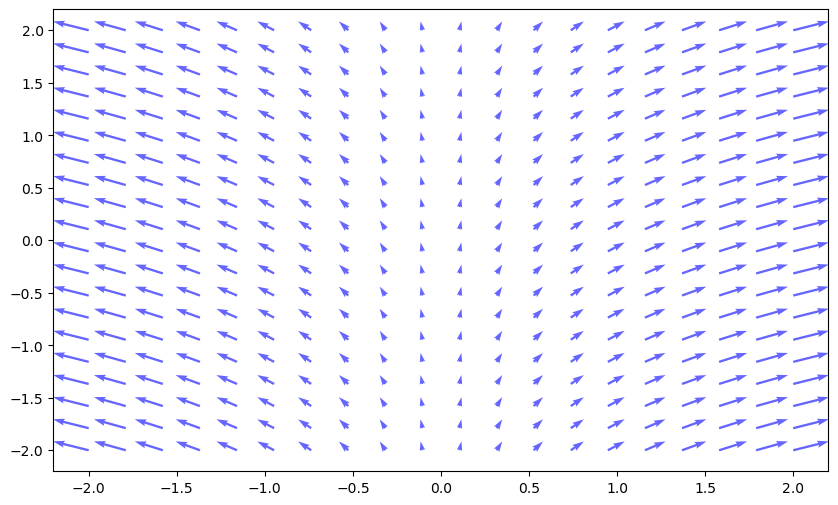

In [52]:
# Compute gradients and directional derivatives
U, V = grad_f(X, Y)


# Plot gradient field
plt.figure(figsize=(10, 6))
plt.quiver(X, Y, U, V, color='blue', label='Gradient ∇f', alpha=0.6)




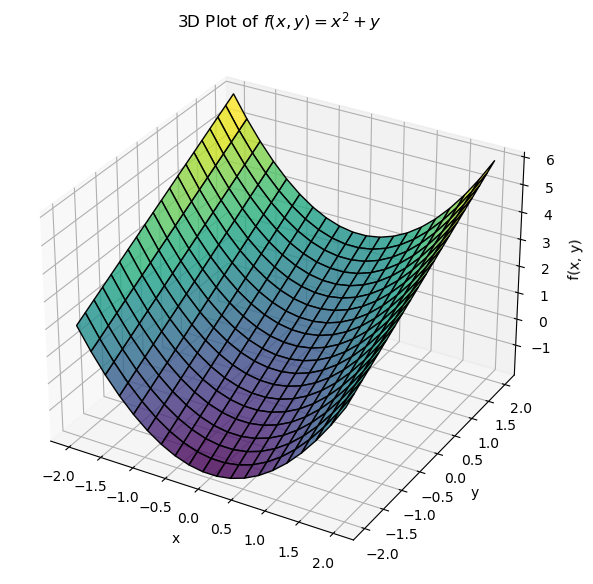

In [54]:
from mpl_toolkits.mplot3d import Axes3D

# Create the figure and 3D axis
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Compute function values
Z = f(X, Y)

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Labels and title
ax.set_title(r"3D Plot of $f(x, y) = x^2 + y$")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

plt.show()


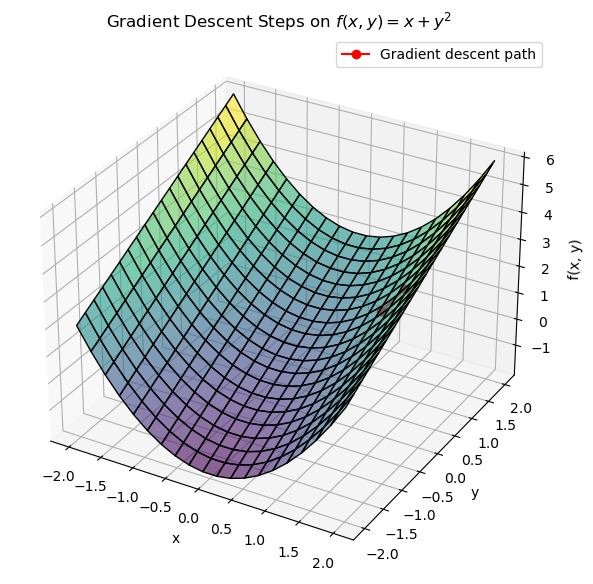

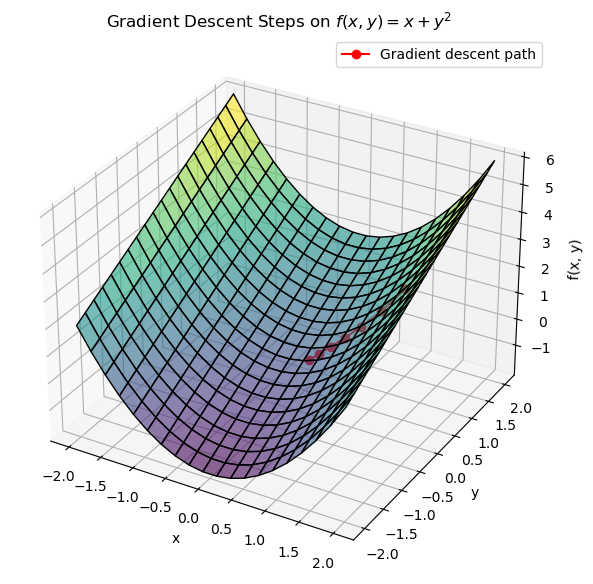

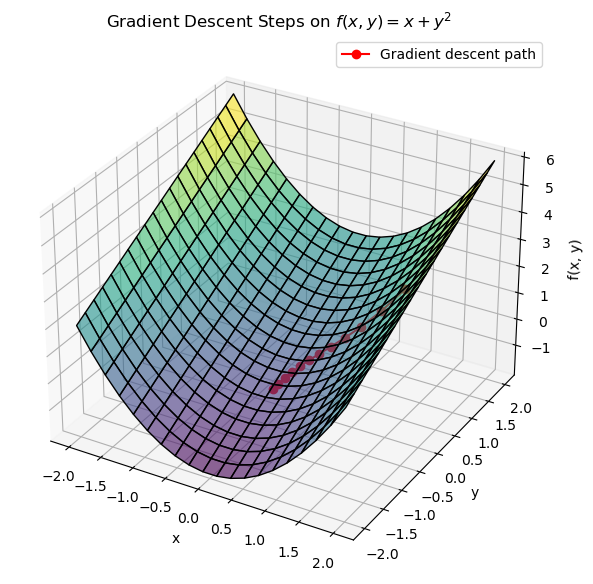

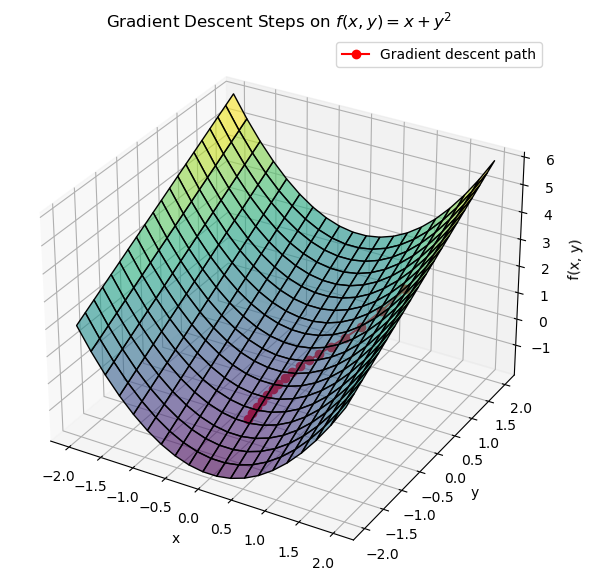

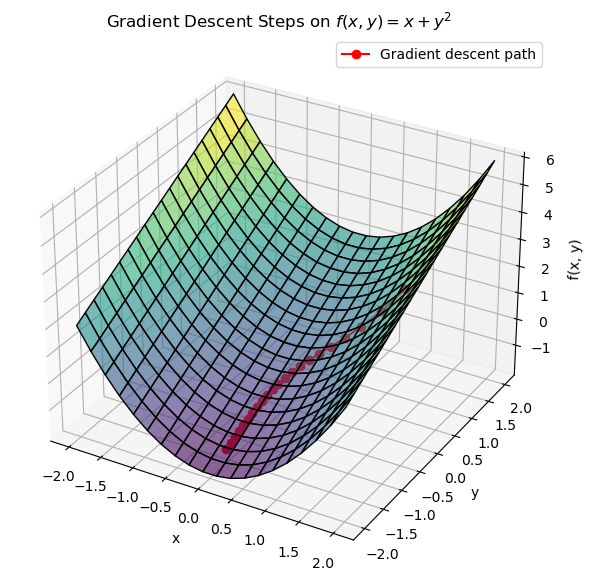

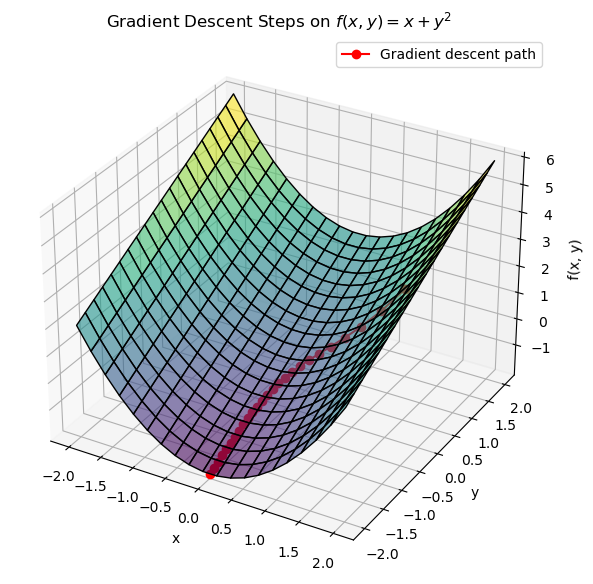

[array([1.5, 0.5]),
 array([1.2, 0.4]),
 array([0.96, 0.3 ]),
 array([0.768, 0.2  ]),
 array([0.6144, 0.1   ]),
 array([4.91520000e-01, 2.77555756e-17]),
 array([ 0.393216, -0.1     ]),
 array([ 0.3145728, -0.2      ]),
 array([ 0.25165824, -0.3       ]),
 array([ 0.20132659, -0.4       ]),
 array([ 0.16106127, -0.5       ]),
 array([ 0.12884902, -0.6       ]),
 array([ 0.10307922, -0.7       ]),
 array([ 0.08246337, -0.8       ]),
 array([ 0.0659707, -0.9      ]),
 array([ 0.05277656, -1.        ]),
 array([ 0.04222125, -1.1       ]),
 array([ 0.033777, -1.2     ]),
 array([ 0.0270216, -1.3      ]),
 array([ 0.02161728, -1.4       ]),
 array([ 0.01729382, -1.5       ]),
 array([ 0.01383506, -1.6       ]),
 array([ 0.01106805, -1.7       ]),
 array([ 0.00885444, -1.8       ]),
 array([ 0.00708355, -1.9       ]),
 array([ 0.00566684, -2.        ])]

In [55]:
# Define gradient descent algorithm with plotting every few steps
def gradient_descent(f, grad_f, initial_point, learning_rate=0.1, steps=50, plot_every=5):
    point = np.array(initial_point, dtype=float)
    history = [point.copy()]

    for i in range(steps):
        grad = np.array(grad_f(point[0], point[1]))
        point -= learning_rate * grad
        history.append(point.copy())

        if i % plot_every == 0 or i == steps - 1:
            plot_gradient_descent_step(history, f)
    return history

# Helper function to plot the function surface and gradient descent path
def plot_gradient_descent_step(history, f):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Surface
    Z = f(X, Y)
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.6)

    # Path
    path = np.array(history)
    ax.plot(path[:, 0], path[:, 1], f(path[:, 0], path[:, 1]), color='r', marker='o', label='Gradient descent path')


    # Labels
    ax.set_title("Gradient Descent Steps on $f(x, y) = x + y^2$")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.legend()


    plt.show()

# Run the gradient descent visualization
gradient_descent(f, grad_f, initial_point=[1.5, 0.5], learning_rate=0.1, steps=25, plot_every=5)
